# 정적 크롤링 모듈

In [2]:
from bs4 import BeautifulSoup
from urllib.request import urlopen

- 요청 모듈로 가져온 HTML코드를 파이썬이 쓸 수 있는 형태로 변환해주는 역할

In [3]:
url = "http://www.naver.com"

page = urlopen(url)

soup = BeautifulSoup(page, "lxml")

<!DOCTYPE html>
<html data-dark="false" lang="ko"> <head> <meta charset="utf-8"/> <title>NAVER</title> <meta content="IE=edge" http-equiv="X-UA-Compatible"/> <meta content="width=1190" name="viewport"/> <meta content="NAVER" name="apple-mobile-web-app-title"/> <meta content="index,nofollow" name="robots"/> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" name="description"/> <meta content="네이버" property="og:title"/> <meta content="https://www.naver.com/" property="og:url"/> <meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" property="og:image"/> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" property="og:description"/> <meta content="summary" name="twitter:card"/> <meta content="" name="twitter:title"/> <meta content="https://www.naver.com/" name="twitter:url"/> <meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" name="twitter:image"/> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" name="twitter:
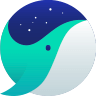
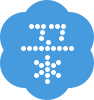

In [7]:
print(soup)

## 파서

- 내가 원하는 데이터를 특정 패턴이나 순서로 추출하여 정보를 가공해주는 프로그램

    - lxml
        - c언어로 구현되어 속도가 가장 빠름
        - 불안정함 (가끔 뭔가를 빼먹기도 함)
        
    - html5lib
        - 웹브라우저 형태로 HTML을 분석
        - 속도가 가장 느림
        - 가장 안정적
        
    - html.parser
        - lxml과 html5lib의 중간 속도 (lxml에 가까움)
        - 안정성도 중간 정도

## 속성 데이터

- html
    - head
        - title(class = "t", id = "ti") <- class = 유사한 서식을 가진 것을 묶은 카테고리 (라벨 개념), id = 해당 개체의 고유 id (primary key 개념)
    - body
        - p
        - p
        - p

In [5]:
html = """<html> <head><title class="t" id="ti">test site</title></head> <body> <p>test</p> <p>test1</p> <p>test2</p> </body></html>"""

In [6]:
soup = BeautifulSoup(html, "lxml")

In [9]:
tag_title = soup.title # 첫 번째로 등장하는 title 태그의 정보

print(tag_title)
print(tag_title.attrs) # 태그의 속성 가져오기
print(tag_title["class"])
print(tag_title["id"])

<title class="t" id="ti">test site</title>
{'class': ['t'], 'id': 'ti'}
['t']
ti


In [10]:
# tag 타입은 딕셔너리처럼 접근할 수 있고 딕셔너리 문법을 그대로 적용할 수 있음
tag_title["class1"]

KeyError: 'class1'

In [12]:
print(tag_title.text)
print(tag_title.string)
print(tag_title.name)

test site
test site
title


In [14]:
# text와 string의 차이
tag_body = soup.body

print(tag_body.text, type(tag_body.text)) # 하위 태그의 텍스트까지 전부 출력 (p 3개)
print(tag_body.string, type(tag_body.string)) # 자기 자신의 값만 출력 (없으니 None 출력)

 test test1 test2  <class 'str'>
None <class 'NoneType'>


- text
    - 하위 태그들의 값도 모두 출력
- string
    - 정확히 해당 태그에 대한 값만 출력

In [15]:
soup.body.p.string

'test'

## 원하는 요소에 접근하기

### find_all()

- 원하는 태그들을 리스트 형태로 가져오기

- html
    - head
        - title
    - body
        - p
        - p
        - p
        - a
        - b

In [26]:
html = """<html> <head><title>test site</title></head> <body> <p id="i" class="a">test1</p><p id="d" class="d">test2</p><p class="c">test3</p></p><a>a tag</a> <b>b tag</b></body></html>"""

In [27]:
soup = BeautifulSoup(html, "lxml")

In [28]:
soup.find_all("title")

[<title>test site</title>]

In [29]:
soup.find_all("p")

[<p class="a" id="i">test1</p>,
 <p class="d" id="d">test2</p>,
 <p class="c">test3</p>]

- id 값으로 태그 가져요기

In [30]:
soup.find_all(id = "d")

[<p class="d" id="d">test2</p>]

In [32]:
# id의 존재 여부로 데이터 가져오기
soup.find_all(id = True)

[<p class="a" id="i">test1</p>, <p class="d" id="d">test2</p>]

In [33]:
# 원하는 태그, 원하는 id 값으로 태그 가져오기
print(soup.find_all("p", id = "d"))

[<p class="d" id="d">test2</p>]


In [35]:
# 원하는 태그, 원하는 class 값으로 태그 가져오기
print(soup.find_all("p", class_ = "d"))
print(soup.find_all("p", class_ = "c"))

[<p class="d" id="d">test2</p>]
[<p class="c">test3</p>]


### find()

- 하나의 요소만 가져옴
- 찾고자 하는 요소가 하나만 있을 때 사용
    - 예) id값으로 접근

In [36]:
soup.find("p")

<p class="a" id="i">test1</p>

In [38]:
print(soup.find("p", class_ = "d"))
print(soup.find("p", id = "i"))
print(soup.find(id = "i"))

<p class="d" id="d">test2</p>
<p class="a" id="i">test1</p>
<p class="a" id="i">test1</p>


In [39]:
# 연속으로 find() 사용
soup.find("body").find("p", class_ = "d")

<p class="d" id="d">test2</p>

### select()

- find_all()과 마찬가지로 매칭되는 모든 결과를 리스트로 반환
- 클래스는 마침표(.), 아이디는 샵(#)으로, 자손태그는 띄어쓰기로 표현
- select_one()으로 하나의 결과만 반환하는 것도 가능

In [40]:
print(soup.select("p")) # p태그
print(soup.select(".d")) # 클래스가 d인 태그
print(soup.select("p.d")) # 클래스가 d인 p태그
print(soup.select("#i")) # id가 i인 태그
print(soup.select("p#i")) # id가 i인 p태그

[<p class="a" id="i">test1</p>, <p class="d" id="d">test2</p>, <p class="c">test3</p>]
[<p class="d" id="d">test2</p>]
[<p class="d" id="d">test2</p>]
[<p class="a" id="i">test1</p>]
[<p class="a" id="i">test1</p>]


- html
    - head
        - title
    - body
        - div
            - p
            - p
        - p
        - a
        - b

In [41]:
html = html = """<html> <head><title>test site</title></head> <body> <div><p id="i" class="a">test1</p><p class="d">test2</p></div><p class="d">test3</p></p> <a>a tag</a> <b>b tag</b></body></html>"""

In [42]:
soup = BeautifulSoup(html, "lxml")

In [43]:
print(soup.select("body p")) # body의 자손 p태그
print(soup.select("body .d")) # body의 자손 중 클래스가 d인 태그
print(soup.select("body p.d")) # body의 자손 중 클래스가 d인 p태그
print(soup.select("body #i")) # body의 자손 중 id가 i인 태그
print(soup.select("body p#i")) # body의 자손 중 id가 i인 p태그
print(soup.select("div p")) # div의 자손 p태그

[<p class="a" id="i">test1</p>, <p class="d">test2</p>, <p class="d">test3</p>]
[<p class="d">test2</p>, <p class="d">test3</p>]
[<p class="d">test2</p>, <p class="d">test3</p>]
[<p class="a" id="i">test1</p>]
[<p class="a" id="i">test1</p>]
[<p class="a" id="i">test1</p>, <p class="d">test2</p>]
